In [5]:
import cv2
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pygame

In [6]:
data_dir = "DROWSINESS"  
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_generator = datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')


Found 35163 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


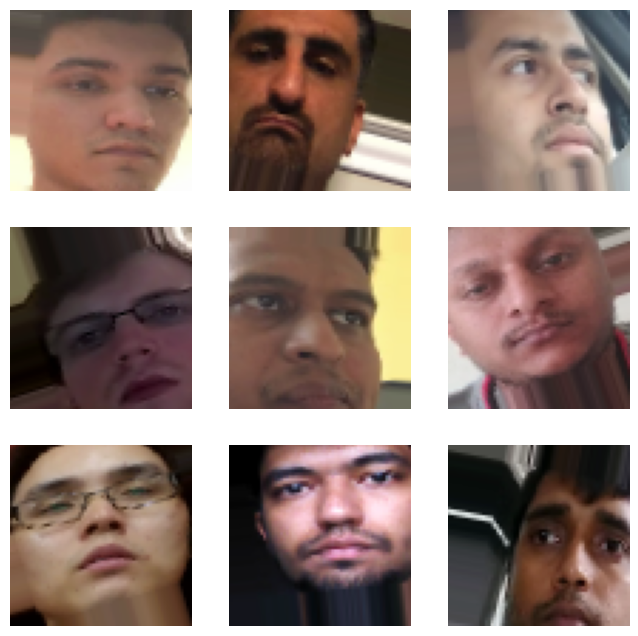

In [8]:
# Visualizing Sample Images
def plot_sample_images(generator):
    images, labels = next(generator)
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis('off')
    plt.show()

plot_sample_images(train_generator)

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)#are used to stop training early if validation accuracy stops improving.
checkpoint = ModelCheckpoint("best_drowsiness_model.keras", monitor='val_accuracy', save_best_only=True)


In [12]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10, callbacks=[early_stopping, checkpoint]) #training

Epoch 1/10


C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1099/1099 ━━━━━━━━━━━━━━━━━━━━ 740s 666ms/step - accuracy: 0.6802 - loss: 0.5442 - val_accuracy: 0.6743 - val_loss: 0.8268
Epoch 2/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 175s 158ms/step - accuracy: 0.9598 - loss: 0.1109 - val_accuracy: 0.7844 - val_loss: 0.6808
Epoch 3/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 174s 157ms/step - accuracy: 0.9794 - loss: 0.0600 - val_accuracy: 0.7064 - val_loss: 0.7294
Epoch 4/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 172s 155ms/step - accuracy: 0.9875 - loss: 0.0361 - val_accuracy: 0.8303 - val_loss: 0.4455
Epoch 5/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 176s 159ms/step - accuracy: 0.9890 - loss: 0.0308 - val_accuracy: 0.7202 - val_loss: 0.8371
Epoch 6/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 173s 157ms/step - accuracy: 0.9908 - loss: 0.0283 - val_accuracy: 0.8028 - val_loss: 0.5255
Epoch 7/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 174s 157ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.8119 - val_loss: 0.4943
Epoch 8/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 172s 156ms/step - accuracy: 0.9

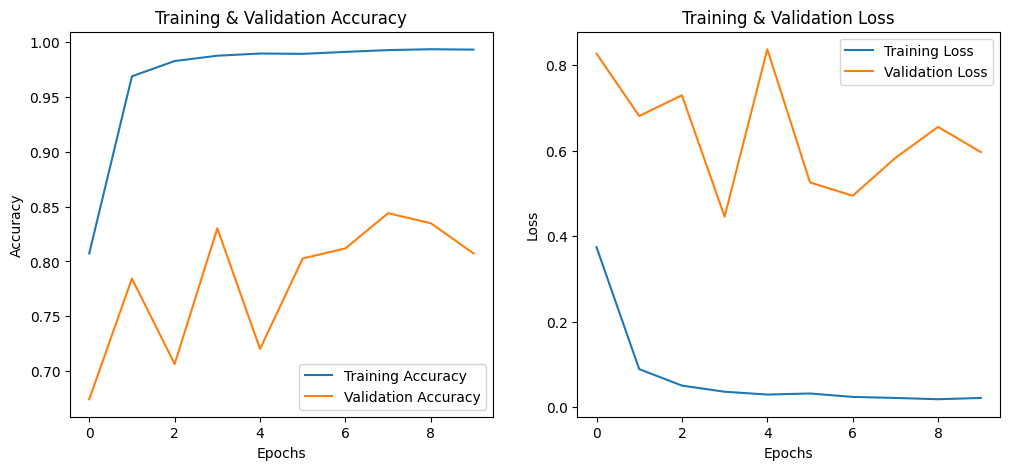

In [13]:
# Training History Visualization
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')
    
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')
    
    plt.show()

plot_training_history(history)

In [ ]:
train_acc = history.history['accuracy'][-1]          #accuracy
val_acc = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

Training Accuracy: 99.33%
Validation Accuracy: 80.73%


In [15]:
model = tf.keras.models.load_model("best_drowsiness_model.keras")